# Data Cleaning - Outliers Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Code to save figures as High-res PNG

import os
from pathlib import Path
from matplotlib import pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Load dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


# Duplicate Rows

In [7]:
# Check the shape of the df
print('Shape of the dataset:',df.shape)
# Check for duplicate rows
dup = df[df.duplicated()]
print('Number of duplicate rows:',dup.shape)

Shape of the dataset: (100000, 9)
Number of duplicate rows: (3854, 9)


In [8]:
# Drop duplicate rows
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [10]:
df.shape

(100000, 9)

In [11]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(96146, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


# Outliers

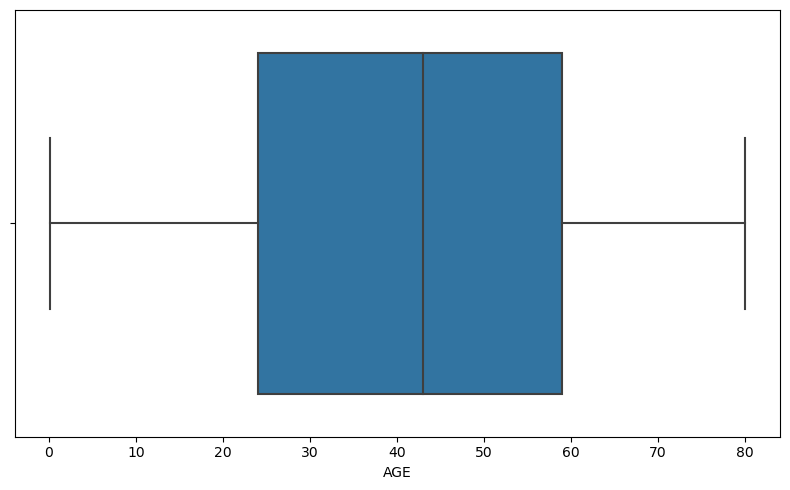

In [15]:
# Set the plot figure
plt.figure(figsize=(8,5))
# Boxplot
sns.boxplot(x=df['age'])
plt.xlabel("AGE")
save_fig('Outliers-AGE')
plt.show()

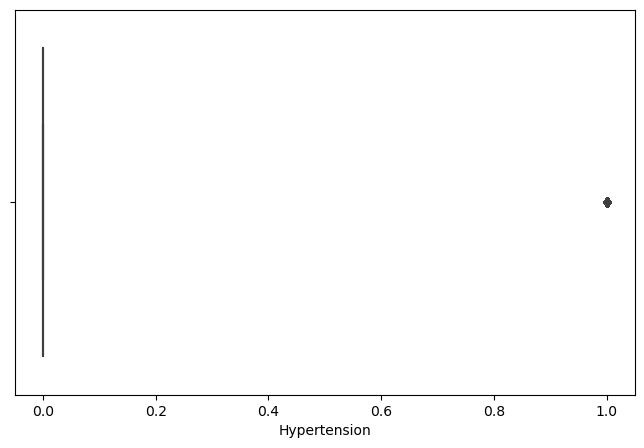

In [16]:
# Set the plot figure
plt.figure(figsize=(8,5))
# Boxplot
sns.boxplot(x=df['hypertension'])
plt.xlabel("Hypertension")
plt.show()

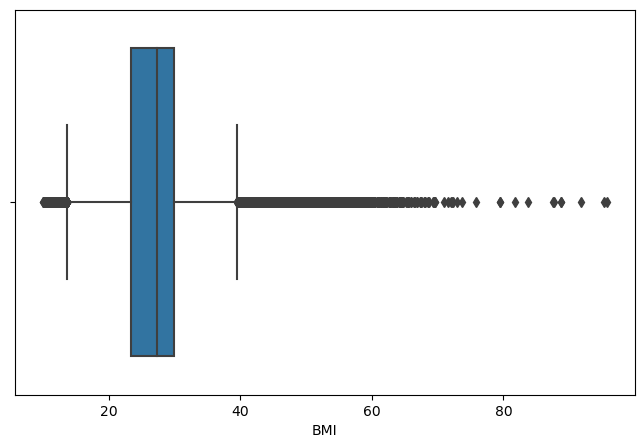

In [17]:
# Set the plot figure
plt.figure(figsize=(8,5))
# Boxplot
sns.boxplot(x=df['bmi'])
plt.xlabel("BMI")
plt.show()

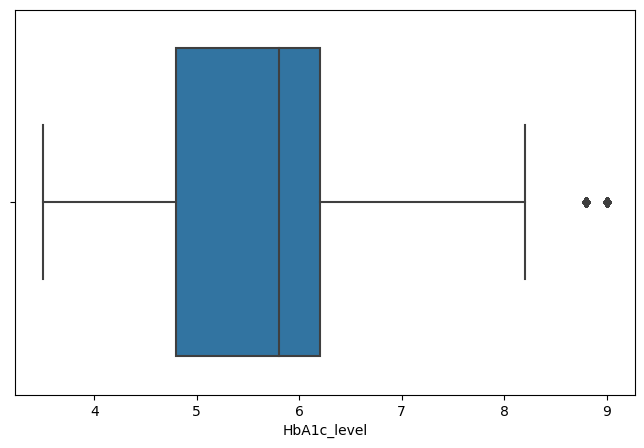

In [18]:
# Set the plot figure
plt.figure(figsize=(8,5))
# Boxplot
sns.boxplot(x=df['HbA1c_level'])
plt.xlabel("HbA1c_level")
plt.show()

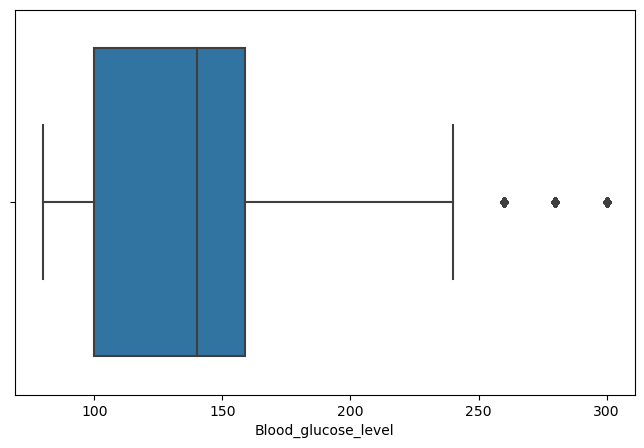

In [19]:
# Set the plot figure
plt.figure(figsize=(8,5))
# Boxplot
sns.boxplot(x=df['blood_glucose_level'])
plt.xlabel("Blood_glucose_level")
plt.show()

# Count Outliers

In [20]:
def count_outliers(dataframe, column_name):
    column_data = dataframe[column_name]
    
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    outliers = column_data[(column_data<lower_bound) | (column_data>upper_bound)]
    return len(outliers)

In [23]:
count_outliers(df,'bmi')

5354

In [24]:
count_outliers(df,'HbA1c_level')

1312

In [25]:
count_outliers(df,'blood_glucose_level')

2031

In [26]:
attributes = ['age', 'HbA1c_level', 'blood_glucose_level']

for attribute in attributes:
    count = count_outliers(df, attribute)
    print(attribute)
    print('Number of outliers:',count,'out of',len(df[attribute]))

age
Number of outliers: 0 out of 96146
HbA1c_level
Number of outliers: 1312 out of 96146
blood_glucose_level
Number of outliers: 2031 out of 96146
